# Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-20 09:32:29 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
X,y = datasets.load_breast_cancer(as_frame=True,return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=335)
train_data = pd.concat([X_train,y_train],axis=1)
eval_data = pd.concat([X_test,y_test],axis=1)

# Without Feature_selection
_best_reward is 0.9734

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)","(171, 30)","(171,)","(171, 30)",binary(2)


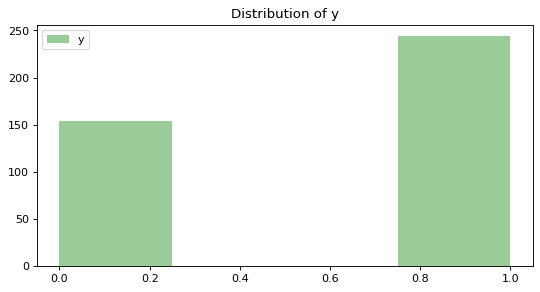

## Data Clean

### Initliazed parameters

,key,value
0,cv,False
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,"(171, 30)"
6,y_eval.shape,"(171,)"
7,X_test.shape,"(171, 30)"
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,False
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,20,0.964286,11,0.973214,23.091416,20,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,11,0.973214,0.146405,"[1, 2, 0, 3, 2, 0, 1, 0, 3, 0]"
1,5,0.972222,4.926881,"[1, 0, 1, 2, 0, 1, 3, 1, 2, 0, 4]"
2,8,0.972222,1.313127,"[1, 2, 0, 3, 0, 1, 4, 1, 3, 2]"
3,2,0.965517,3.010847,"[2, 3, 1, 0, 3, 0, 0]"
4,15,0.965517,0.471380,"[2, 2, 1, 1, 1, 1, 0]"


#### Best Trial:

key,value
signature,efa0b027dff5f7cb032664969d49ae84
vectors,"[1, 2, 0, 3, 2, 0, 1, 0, 3, 0]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,False
3-Module_XGBoostEstimator_1.max_depth,10
4-Module_XGBoostEstimator_1.learning_rate,0.5
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,1
7-Module_XGBoostEstimator_1.min_child_weight,1


### Fitted parameters

,key,value
0,input_features,"[mean texture, mean perimeter, mean area, mean..."
1,best_reward,0.973684
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.9736842105263158, 0.9736842105263158, 0.973..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


In [3]:
experiment = make_experiment(train_data.copy(),eval_data=eval_data.copy(),target='target', 
                             reward_metric='precision',pos_label=1,
                             random_state=8888,cv=False,
                             max_trials=20)
estimator = experiment.run()

In [4]:
scorer = get_scorer(metric_to_scoring('precision',pos_label=1))
score = scorer(estimator, X_test, y_test)
score

0.9734513274336283

# Use Feature_selection
_best_reward is 0.9736  
-- feature_selection_threshold : Confidence threshold of feature_importance  
-- feature_selection_quantile : Confidence quantile of feature_importance  
-- feature_selection_number : Expected feature number to keep

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)","(171, 30)","(171,)","(171, 30)",binary(2)


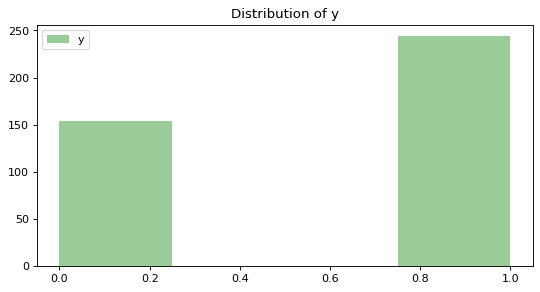

## Data Clean

### Initliazed parameters

,key,value
0,cv,False
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,"(171, 30)"
6,y_eval.shape,"(171,)"
7,X_test.shape,"(171, 30)"
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Feature Selection

### Initliazed parameters

,key,value
0,name,feature_selection
1,number,None
2,quantile,None
3,strategy,None
4,threshold,0.4


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean texture, mean perimeter, mean area, mean..."
2,unselected_features,"[mean radius, mean compactness, smoothness err..."
3,importances,"[0.0, 34.467647194862366, 9.056580185890198, 1..."


### Feature importances

,feature,importance,selected
27,worst concave points,359.476806,True
7,mean concave points,268.476442,True
23,worst area,194.999175,True
22,worst perimeter,153.040536,True
20,worst radius,70.350800,True
13,area error,68.603960,True
21,worst texture,44.829446,True
1,mean texture,34.467647,True
26,worst concavity,23.952763,True
3,mean area,16.136280,True


## Space Searching

### Initliazed parameters

,key,value
0,cv,False
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,20,0.956897,17,0.973684,14.602445,19,20


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,17,0.973684,2.633001,"[2, 3, 1, 2, 3, 0, 0]"
1,11,0.972973,0.140982,"[1, 0, 0, 2, 2, 0, 0, 2, 1, 1]"
2,15,0.972727,0.532316,"[1, 3, 0, 1, 1, 1, 4, 0, 0, 0]"
3,7,0.971963,1.112061,"[1, 3, 1, 0, 0, 1, 1, 1, 5, 4, 4]"
4,6,0.965217,0.192059,"[0, 1, 1, 0, 60, 0, 2, 1, 1, 4]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 3, 1, 2, 3, 0, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,10
5-Module_CatBoostEstimator_1.l2_leaf_reg,None
6-numeric_or_scaler_0.hp_or,0


### Fitted parameters

,key,value
0,input_features,"[mean texture, mean perimeter, mean area, mean..."
1,best_reward,0.973684
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,scores,"[0.9736842105263158, 0.9736842105263158, 0.973..."
2,best_stack,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,hits,{0: 20}
4,ensemble_size,20


0.9736842105263158

In [7]:
#feature_selection_number = 15
#feature_selection_quantile = 0.1
#feature_selection_threshold = 0.1
experiment = make_experiment(train_data.copy(),eval_data=eval_data.copy(), target='target', 
                             reward_metric='precision',pos_label=1,
                             random_state=8888,max_trials=20,cv=False,
                             feature_selection=True,
                             feature_selection_threshold=0.4)
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('precision',pos_label=1))
score = scorer(estimator, X_test, y_test)
score